## CSCI 316, T01, G04
## Group Assignment 1

- Emily Gong Xue Ying: 7673620
- Lai Wei Jie: 7770042
- Lee Kuok Wei : 7673607

# End to End Data Mining Project
## Classification Problem: The task is to predict whether a record represents “normal” or “attack”

Target variable: 'label'

- a) Discover and visualise the data
- b) Prepare the data for ML
- c) Select and train models
- d) Fine-tune the models
- e) Evaluate outcomes

# Discover and visualise the data

Dataset: This dataset has nine types of attacks, namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.


A partition from this dataset was configured as a training set and testing set. The number of records in the training set is 175,341 records and the testing set is 82,332 records from the different types, attack and normal.

## Uploading and reading the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import csv

#import train and test datasets

path = "/content/drive/MyDrive/UNSW_NB15_testing-set.csv"
train =  pd.read_csv(path)

path = "/content/drive/MyDrive/UNSW_NB15_training-set.csv"
test =  pd.read_csv(path)



In [3]:
train.shape

(175341, 45)

In [4]:
test.shape

(82332, 45)

## Visualise the data

###Histograms

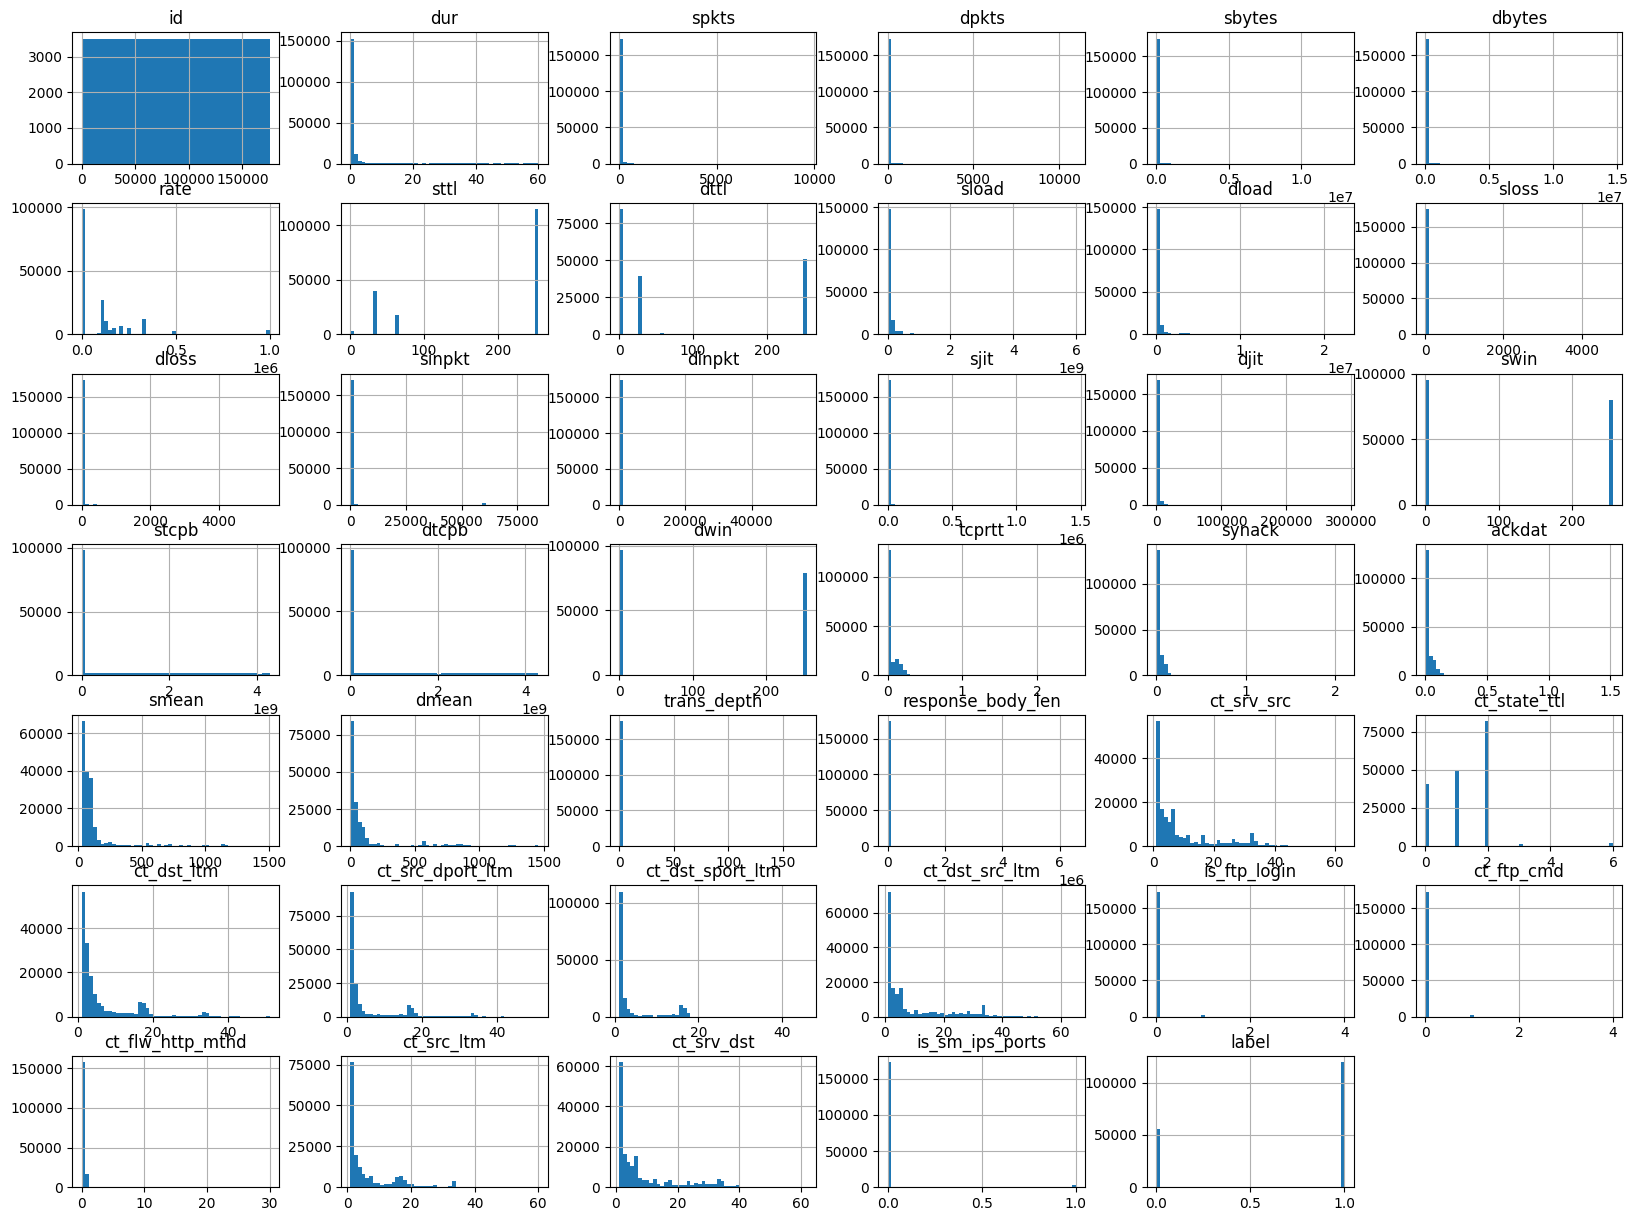

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the histograms for attributes
train.hist(bins = 50, figsize = (20, 15))
plt.show()

### Interpretation

To start off, the x-axis represents the range of values for each attribute and is divided into bins that represents a specific range of values. The y-axis represents the frequency of values within each bin. It shows how many data points fall within the corresponding range of values on the x-axis.

1) Shape of histograms

Symmetric Distribution: The histogram is roughly symmetrical around a central value which indicates a normal distribution. This means that the data points are evenly distributed around the mean, and there are approximately an equal number of data points on both sides of the central value.

Skewed Distribution: The histogram is skewed to the left or right. A left-skewed (negative-skewed) distribution indicates that the majority of the data points are on the right side. A right-skewed (positive-skewed) distribution indicates that the majority of the data points are on the left side. An example of this is ct_srv_src.

2) Central Tendency: The central tendency of the data can be estimated from the histogram. For a symmetric distribution, the peak of the histogram corresponds to the mean, median, and mode, which are all the same in a normal distribution. For skewed distributions, these measures may differ.

3) Spread: The spread or variability of the data can be observed by looking at the width of the histogram. A wider histogram indicates higher variability, whereas a narrower histogram indicates lower variability.

4) Outliers: Outliers, which are extreme values in the data, can also be identified from the histogram. Outliers are data points that lie far away from the bulk of the data and may appear as isolated bars far from the main distribution. For example, it is observed that there are outliers in the histogram of rate.

5) Multimodal Distribution: If there are multiple peaks in the histogram, it suggests a multimodal distribution, indicating that the data may have multiple distinct groups or categories. An example of this is ct_state_ttl.

### Skewed distribution example

<Axes: >

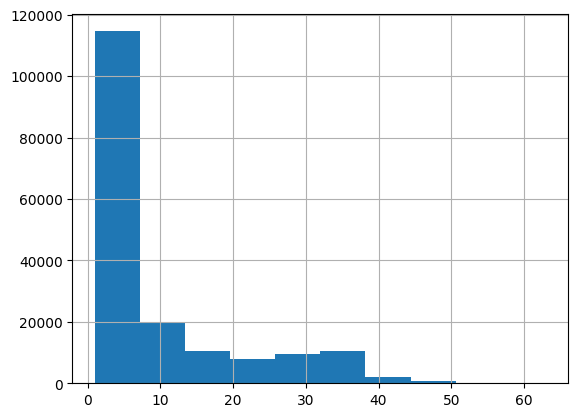

In [6]:
train['ct_srv_src'].hist()

### Outliers example

<Axes: >

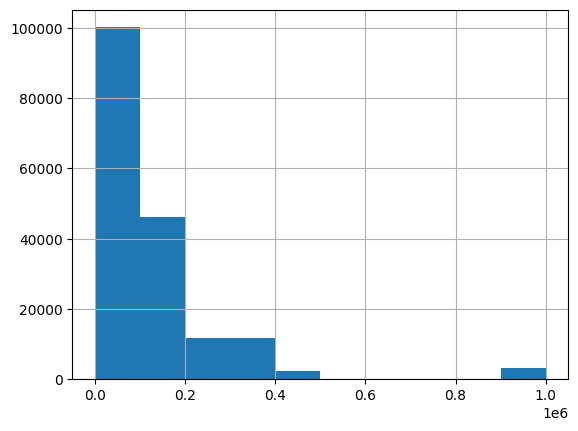

In [7]:
train['rate'].hist()

### Multimodal distribution example

<Axes: >

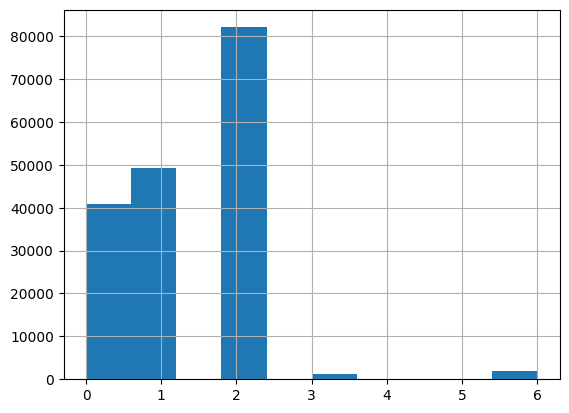

In [8]:
train['ct_state_ttl'].hist()

## Exploration of the data

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

Exploration of both datasets shows no missing value, and 4 'object' types to encode.

Moving forward, we will first drop the 'id' column from both datasets.

# Prepare the data for machine learning algorithms




In [11]:
#Dropping 'id' column
columns_to_drop = ['id', 'attack_cat']
train = train.drop(columns=columns_to_drop)
test  = test.drop(columns=columns_to_drop)

In [12]:
train.shape

(175341, 43)

In [13]:
test.shape

(82332, 43)

## Check for duplicate rows

### Training data

In [14]:
# Check if there is any duplicate rows and drop them
print(f"Number of duplicate rows: {train.duplicated().sum()}")
train = train.drop_duplicates(subset = None, keep = 'first', inplace = False)

Number of duplicate rows: 74072


In [15]:
train.shape

(101269, 43)

### Testing data

In [16]:
# Check if there is any duplicate rows and drop them
print(f"Number of duplicate rows: {test.duplicated().sum()}")
test = test.drop_duplicates(subset = None, keep = 'first', inplace = False)

Number of duplicate rows: 28380


In [17]:
test.shape

(53952, 43)

## Encoding categorical variables

In [18]:
# Identify the categorical columns in training set
categorical_columns = train.select_dtypes(include=['object']).columns
categorical_columns

Index(['proto', 'service', 'state'], dtype='object')

In [19]:
# Identify the categorical columns in testing set
categorical_columns = train.select_dtypes(include=['object']).columns
categorical_columns

Index(['proto', 'service', 'state'], dtype='object')

To calculate the correlations, categorical columns need to be converted to numerical columns in the first place.

In the list above, one-hot encoding will be applied to categorical attributes as they are nominal and do not have an inherent order.

When performing one-hot encoding on categorical variables, it can introduce different sets of columns in the training and testing datasets, leading to a mismatch in the number of features.

To resolve this issue, I ensure that the same set of one-hot encoding columns is applied to both the training and testing datasets.

### 'proto' attributes

In [20]:
train['proto'].value_counts()

tcp     76119
udp     22984
arp       633
unas      474
ospf      196
        ...  
ip          5
tlsp        5
cbt         5
ggp         4
rtp         1
Name: proto, Length: 133, dtype: int64

In [21]:
test['proto'].value_counts()

tcp       40527
udp       12523
arp         298
unas        199
ospf         74
          ...  
narp          2
rvd           2
i-nlsp        2
mhrp          2
ib            2
Name: proto, Length: 131, dtype: int64

Training set and testing set has different number of unique values for the 'proto' attirbute, applying simple One Hot Encoding will lead to addition of a lot of dimensions, and a mismatch between the two sets for training.

***The strategy here would be to encode the top two values: 'tcp' and 'udp', and the rest as 'others' ***

In [22]:
# Define a custom function to categorize protocols
def categorize_protocol(proto):
    if proto == 'tcp':
        return 'tcp'
    elif proto == 'udp':
        return 'udp'
    else:
        return 'other'


Encode 'proto' in training set

In [23]:
# Apply the custom function to create the "category" column
train['category'] = train['proto'].apply(categorize_protocol)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(train['category'], prefix='proto', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)

# Drop the original "proto" and "category
train.drop(['proto', 'category'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101269 entries, 0 to 175337
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101269 non-null  float64
 1   service            101269 non-null  object 
 2   state              101269 non-null  object 
 3   spkts              101269 non-null  int64  
 4   dpkts              101269 non-null  int64  
 5   sbytes             101269 non-null  int64  
 6   dbytes             101269 non-null  int64  
 7   rate               101269 non-null  float64
 8   sttl               101269 non-null  int64  
 9   dttl               101269 non-null  int64  
 10  sload              101269 non-null  float64
 11  dload              101269 non-null  float64
 12  sloss              101269 non-null  int64  
 13  dloss              101269 non-null  int64  
 14  sinpkt             101269 non-null  float64
 15  dinpkt             101269 non-null  float64
 16  sj

Encode 'proto' in testing set


In [24]:
# Apply the custom function to create the "category" column
test['category'] = test['proto'].apply(categorize_protocol)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(test['category'], prefix='proto', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
test = pd.concat([test, one_hot_encoded], axis=1)

# Drop the original "proto" and "category
test.drop(['proto', 'category'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53952 entries, 0 to 82328
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53952 non-null  float64
 1   service            53952 non-null  object 
 2   state              53952 non-null  object 
 3   spkts              53952 non-null  int64  
 4   dpkts              53952 non-null  int64  
 5   sbytes             53952 non-null  int64  
 6   dbytes             53952 non-null  int64  
 7   rate               53952 non-null  float64
 8   sttl               53952 non-null  int64  
 9   dttl               53952 non-null  int64  
 10  sload              53952 non-null  float64
 11  dload              53952 non-null  float64
 12  sloss              53952 non-null  int64  
 13  dloss              53952 non-null  int64  
 14  sinpkt             53952 non-null  float64
 15  dinpkt             53952 non-null  float64
 16  sjit               539

In [25]:
train.shape

(101269, 45)

In [26]:
test.shape

(53952, 45)


### 'service' attributes

In [27]:
train['service'].value_counts()


-           58668
http        17977
dns         11044
smtp         5020
ftp-data     3282
ftp          2689
ssh          1295
pop3         1104
snmp           59
ssl            56
dhcp           38
irc            25
radius         12
Name: service, dtype: int64

In [28]:
test['service'].value_counts()

-           35068
http         7900
dns          6091
smtp         1759
ftp          1291
ftp-data     1177
pop3          381
ssh           204
ssl            30
snmp           24
dhcp           16
radius          6
irc             5
Name: service, dtype: int64

Both sets have 13 unique values.

**The strategy would be to encode the top values: '-', 'dns', 'http', 'smtp', 'ftp', 'ftp-data' and the rest as others.**

Encode 'service' in training set

In [29]:
# Define the list of top values and the "other" category
top_values = ['-', 'dns', 'http', 'smtp', 'ftp', 'ftp-data']
other_category = 'other'

# Create a new column with values either in the top values list or as "other"
train['service_encoded'] = train['service'].apply(lambda x: x if x in top_values else other_category)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(train['service_encoded'], prefix='service', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)

# Drop the original "service" and "service_encoded" columns
train.drop(['service', 'service_encoded'], axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101269 entries, 0 to 175337
Data columns (total 51 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101269 non-null  float64
 1   state              101269 non-null  object 
 2   spkts              101269 non-null  int64  
 3   dpkts              101269 non-null  int64  
 4   sbytes             101269 non-null  int64  
 5   dbytes             101269 non-null  int64  
 6   rate               101269 non-null  float64
 7   sttl               101269 non-null  int64  
 8   dttl               101269 non-null  int64  
 9   sload              101269 non-null  float64
 10  dload              101269 non-null  float64
 11  sloss              101269 non-null  int64  
 12  dloss              101269 non-null  int64  
 13  sinpkt             101269 non-null  float64
 14  dinpkt             101269 non-null  float64
 15  sjit               101269 non-null  float64
 16  dj

Encode 'service' in testing set

In [30]:
# For testing data

# Create a new column with values either in the top values list or as "other"
test['service_encoded'] = test['service'].apply(lambda x: x if x in top_values else other_category)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(test['service_encoded'], prefix='service', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
test = pd.concat([test, one_hot_encoded], axis=1)

# Drop the original "service" and "service_encoded" columns
test.drop(['service', 'service_encoded'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53952 entries, 0 to 82328
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53952 non-null  float64
 1   state              53952 non-null  object 
 2   spkts              53952 non-null  int64  
 3   dpkts              53952 non-null  int64  
 4   sbytes             53952 non-null  int64  
 5   dbytes             53952 non-null  int64  
 6   rate               53952 non-null  float64
 7   sttl               53952 non-null  int64  
 8   dttl               53952 non-null  int64  
 9   sload              53952 non-null  float64
 10  dload              53952 non-null  float64
 11  sloss              53952 non-null  int64  
 12  dloss              53952 non-null  int64  
 13  sinpkt             53952 non-null  float64
 14  dinpkt             53952 non-null  float64
 15  sjit               53952 non-null  float64
 16  djit               539

In [31]:
train.shape

(101269, 51)

In [32]:
test.shape

(53952, 51)

### 'state' attributes

In [33]:
train['state'].value_counts()

FIN    74306
INT    13721
CON    12363
REQ      783
RST       83
ECO       10
PAR        1
URN        1
no         1
Name: state, dtype: int64

In [34]:
test['state'].value_counts()

FIN    37323
INT     8718
CON     6697
REQ     1208
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

Train set has 7 values. Test set has 9 values.

**We will encode the top values: 'INT', 'FIN', 'CON', 'REQ' and the rest as 'others'.**

Encode 'state' in training set

In [35]:
# Define the list of top values and the "other" category
top_values = ['INT', 'FIN', 'CON', 'REQ']
other_category = 'other'

# Create a new column with values either in the top values list or as "other"
train['state_encoded'] = train['state'].apply(lambda x: x if x in top_values else other_category)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(train['state_encoded'], prefix='state', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
train = pd.concat([train, one_hot_encoded], axis=1)

# Drop the original "state" and "state_encoded" columns
train.drop(['state', 'state_encoded'], axis=1, inplace=True)
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101269 entries, 0 to 175337
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101269 non-null  float64
 1   spkts              101269 non-null  int64  
 2   dpkts              101269 non-null  int64  
 3   sbytes             101269 non-null  int64  
 4   dbytes             101269 non-null  int64  
 5   rate               101269 non-null  float64
 6   sttl               101269 non-null  int64  
 7   dttl               101269 non-null  int64  
 8   sload              101269 non-null  float64
 9   dload              101269 non-null  float64
 10  sloss              101269 non-null  int64  
 11  dloss              101269 non-null  int64  
 12  sinpkt             101269 non-null  float64
 13  dinpkt             101269 non-null  float64
 14  sjit               101269 non-null  float64
 15  djit               101269 non-null  float64
 16  sw

Encode 'state' in testing set

In [36]:
# Create a new column with values either in the top values list or as "other"
test['state_encoded'] = test['state'].apply(lambda x: x if x in top_values else other_category)

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(test['state_encoded'], prefix='state', prefix_sep='_')

# Concatenate the one-hot encoded columns with the original DataFrame
test = pd.concat([test, one_hot_encoded], axis=1)

# Drop the original "state" and "state_encoded" columns
test.drop(['state', 'state_encoded'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53952 entries, 0 to 82328
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                53952 non-null  float64
 1   spkts              53952 non-null  int64  
 2   dpkts              53952 non-null  int64  
 3   sbytes             53952 non-null  int64  
 4   dbytes             53952 non-null  int64  
 5   rate               53952 non-null  float64
 6   sttl               53952 non-null  int64  
 7   dttl               53952 non-null  int64  
 8   sload              53952 non-null  float64
 9   dload              53952 non-null  float64
 10  sloss              53952 non-null  int64  
 11  dloss              53952 non-null  int64  
 12  sinpkt             53952 non-null  float64
 13  dinpkt             53952 non-null  float64
 14  sjit               53952 non-null  float64
 15  djit               53952 non-null  float64
 16  swin               539

Shifting target label to the last column

In [37]:

train = train[[col for col in train.columns if col != 'label'] + ['label']]

test = test[[col for col in test.columns if col != 'label'] + ['label']]


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101269 entries, 0 to 175337
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                101269 non-null  float64
 1   spkts              101269 non-null  int64  
 2   dpkts              101269 non-null  int64  
 3   sbytes             101269 non-null  int64  
 4   dbytes             101269 non-null  int64  
 5   rate               101269 non-null  float64
 6   sttl               101269 non-null  int64  
 7   dttl               101269 non-null  int64  
 8   sload              101269 non-null  float64
 9   dload              101269 non-null  float64
 10  sloss              101269 non-null  int64  
 11  dloss              101269 non-null  int64  
 12  sinpkt             101269 non-null  float64
 13  dinpkt             101269 non-null  float64
 14  sjit               101269 non-null  float64
 15  djit               101269 non-null  float64
 16  sw

In [39]:
train.shape

(101269, 55)

In [40]:
test.shape

(53952, 55)

## Filter by correlation to determine the attributes used to train models

In [41]:
correlation = train.corr()['label'].abs().sort_values(ascending=False)

correlation

label                1.000000
sttl                 0.587313
dttl                 0.553588
ct_state_ttl         0.500807
ackdat               0.387279
tcprtt               0.379212
dload                0.351894
state_CON            0.334804
synack               0.324846
state_INT            0.246223
service_http         0.208635
dmean                0.207194
ct_dst_sport_ltm     0.173568
rate                 0.170367
ct_flw_http_mthd     0.140827
smean                0.130069
sload                0.110136
service_-            0.108634
service_dns          0.104578
ct_src_dport_ltm     0.102564
service_ftp-data     0.097092
ct_srv_dst           0.096549
service_smtp         0.090946
trans_depth          0.079419
ct_srv_src           0.078478
is_sm_ips_ports      0.071756
state_FIN            0.070004
dur                  0.068186
ct_dst_ltm           0.066179
dpkts                0.066086
sinpkt               0.065341
proto_udp            0.057684
state_REQ            0.056114
dloss     

From the result shown above, most of the attributes have the correlation higher than 0.01. Thus, the attributes with absolute correlation higher than 0.01 will be used to train models.


In [42]:
# Filter attributes with correlation lower than 0.01
attributes_filtered = correlation[correlation < 0.01].index
attributes_filtered

Index(['dinpkt', 'response_body_len', 'spkts', 'service_other', 'is_ftp_login',
       'ct_ftp_cmd'],
      dtype='object')

In [43]:
# Remove the filtered attributes from training set
train = train.drop(attributes_filtered, axis=1)
train.shape

(101269, 49)

In [44]:
# Remove the filtered attributes from testing set
test = test.drop(attributes_filtered, axis=1)
test.shape

(53952, 49)

## Check for attributes outliers

In [45]:
outliers = []
def outlierFinder(dataF, col):
  # Use Quatile 3 value to subtract Quatile 1 value to get interquatile range
  # The lower quartile, or first quartile (Q1), is the value under which 25% of data
  # The upper quartile, or third quartile (Q3), is the value under which 75% of data
  Q1 = np.percentile(np.array(dataF[col].tolist()), 25)
  Q3 = np.percentile(np.array(dataF[col].tolist()), 75)
  interquatileRange = Q3-Q1

  upperBound = Q3 + (3 * interquatileRange)
  lowerBound = Q1 - (3 * interquatileRange)

  count = 0

  for value in dataF[col].tolist():
    if((value <lowerBound ) |(value>upperBound)):
      # Increment the outliers count when the values fall outside of the interqu
      count+=1
  outliers.append(count)
  return lowerBound, upperBound, count

Finding outliers in columns of data type Sparse[uint8, 0] may not be meaningful because these columns typically represent categorical variables encoded using one-hot encoding. The Sparse[uint8, 0] data type is used to efficiently store binary data where most of the entries are zero. Thus, only the outliers of the integer and float attributes will be evaluated.

In [46]:
import numpy as np
# Select the numerical attributes
numerical_att = train.select_dtypes(include=['float64', 'int64'])

# Display the number of outliers of each attribute
for attribute in numerical_att:
  if(outlierFinder(train, attribute)[2] > 0):
    print(f'There is {outlierFinder(train, attribute)[2]} outliers in {attribute}')

There is 4056 outliers in dur
There is 6903 outliers in dpkts
There is 9025 outliers in sbytes
There is 15491 outliers in dbytes
There is 13238 outliers in rate
There is 15446 outliers in sload
There is 12423 outliers in dload
There is 4906 outliers in sloss
There is 6224 outliers in dloss
There is 2736 outliers in sinpkt
There is 1938 outliers in sjit
There is 12310 outliers in djit
There is 25161 outliers in swin
There is 222 outliers in tcprtt
There is 271 outliers in synack
There is 288 outliers in ackdat
There is 12171 outliers in smean
There is 18375 outliers in dmean
There is 17095 outliers in trans_depth
There is 3487 outliers in ct_srv_src
There is 724 outliers in ct_state_ttl
There is 5323 outliers in ct_dst_ltm
There is 23099 outliers in ct_src_dport_ltm
There is 6881 outliers in ct_dst_sport_ltm
There is 5120 outliers in ct_dst_src_ltm
There is 17095 outliers in ct_flw_http_mthd
There is 5384 outliers in ct_src_ltm
There is 3430 outliers in ct_srv_dst
There is 545 outliers 

### Find the top 3 attributes with the most outliers

In [47]:
# To remove outliers in the list
unique_outliers = frozenset(outliers)
total_outliers = 0
sorted_outliers = sorted(unique_outliers, reverse = True)

for outlier in unique_outliers:
 total_outliers += outlier

print("Total number of outliers: ", total_outliers)
# We arrange the outliers number in descending order
print("Outliers in descending orders: ", sorted_outliers)

Total number of outliers:  232272
Outliers in descending orders:  [25161, 23099, 18375, 17095, 15491, 15446, 13238, 12423, 12310, 12171, 9025, 6903, 6881, 6224, 5384, 5323, 5120, 4906, 4056, 3487, 3430, 2736, 1938, 724, 545, 288, 271, 222, 0]


From the result shown above, the top 3 attributes with the most outliers are sload, rate, and dload. However, these attributes have relatively high correlations with the target attribute, so they will not be removed.

The presence of outliers will be kept in mind as we move to select and train models for classification.

## Validating Training Set

Checking the order and sequence of both sets

In [48]:
if list(train.columns) == list(test.columns):
    print("Both DataFrames have the same columns in the same sequence.")
else:
    print("The DataFrames have different columns or different sequence.")

Both DataFrames have the same columns in the same sequence.


In [49]:
# Check for missing values for Train
missing_values = train.isnull().any()

# Get the columns with missing data for Train
columns_with_missing_data = missing_values[missing_values].index

# Print the columns with missing data
if len(columns_with_missing_data) > 0:
    for column in columns_with_missing_data:
        print("Columns With Missing Data In Train Set: "+column)
else:
    print("No Missing Data For Train.")

# Check for missing values for Test
missing_values = test.isnull().any()

# Get the columns with missing data for Train
columns_with_missing_data = missing_values[missing_values].index

# Print the columns with missing data
if len(columns_with_missing_data) > 0:
    for column in columns_with_missing_data:
        print("Columns With Missing Data In Test Set: "+column)
else:
    print("No Missing Data For Test.")


No Missing Data For Train.
No Missing Data For Test.


In [50]:
train.shape

(101269, 49)

In [51]:
test.shape

(53952, 49)

# Select and train models

## Scaling the data

Using pyspark

In [52]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=05c4dfef5d9716ff348ab8309fb66e4affe1308e07d6beaf4fd7ad9b8d9886a0
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [53]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler

# Create a Spark session
spark = SparkSession.builder.appName("ScalingExample").getOrCreate()

train = spark.createDataFrame(train)

test = spark.createDataFrame(test)

# Assemble features into a single vector column
feature_columns = train.columns[:-1]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
train = vector_assembler.transform(train)

# Assemble features into a single vector column
feature_columns = test.columns[:-1]
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
test = vector_assembler.transform(test)

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Fit and transform the scaler
min_max_scaler_model = min_max_scaler.fit(train)
train_scaled = min_max_scaler_model.transform(train)

# Fit and transform the scaler
test_scaled = min_max_scaler_model.transform(test)

# Show the scaled features
train_scaled.select("scaled_features").show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                                                                                                                                                  

In [54]:
# Show the scaled features
test_scaled.select("scaled_features").show(truncate=False)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled_features                                                                                                                                                                                                                                                                                                   |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|(48,[0,2,4,5,7,11,21,24,25,29,32,36,37,45],[1.8333336694445063E-7,3.6096

## Decision Tree

In [55]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("DecisionTreeClassification").getOrCreate()

# Assuming train_scaled is your scaled DataFrame
# Initialize a Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="label", featuresCol="scaled_features")

# Train the Decision Tree model
dt_model = dt.fit(train_scaled)

# Make predictions on the testing set
dtpredictions = dt_model.transform(test_scaled)

# Initialize evaluator for precision, recall, F1-score, and accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate metrics
precision = evaluator.evaluate(dtpredictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(dtpredictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(dtpredictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(dtpredictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.8461317278435517
Recall: 0.7349681198102016
F1 Score: 0.7351905969178332
Accuracy: 0.7349681198102017


In [56]:
evaluation = evaluator.evaluate(dtpredictions)

print("evaluation (area under ROC): %f" % evaluation)

evaluation (area under ROC): 0.735191


### Random Forest

In [57]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize a Spark session
spark = SparkSession.builder.appName("RandomForest").getOrCreate()

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(labelCol="label", featuresCol="scaled_features")
rf_model = rf_classifier.fit(train_scaled)

# Make predictions on the test data
rfpredictions = rf_model.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(rfpredictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(rfpredictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(rfpredictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(rfpredictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8463259427029326
Recall: 0.7350978647686832
F1 Score: 0.7353163775585887
Accuracy: 0.7350978647686833


In [58]:
evaluation = evaluator.evaluate(rfpredictions)

print("evaluation (area under ROC): %f" % evaluation)

evaluation (area under ROC): 0.735316


### XGBoost

In [60]:
!pip install sparkxgb


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 22.8 MB/s eta 0:00:00
  Created wheel for sparkxgb: filename=sparkxgb-0.1-py3-none-any.whl size=5627 sha256=673364ed3e8dd4446be8fc3db26988a33747a232ba0114510df34effef7c2073
  Stored in directory: /root/.cache/pip/wheels/b7/0c/a1/786408e13056fabeb8a72134e101b1e142fc95905c7b0e2a71
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767581 sha256=e649aca040b87d5d8b5f6a0a578224ef53c7260f44f3038cd0027624d524a148
  Stored in directory: /root/.cache/pip/wheels/a0/3f/72/8efd988f9ae041f051c75e6834cd92dd6d13a726e206e8b6f3
Successfully built sparkxgb pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
  Attempting uninstall: pyspark
    Found 

In [61]:
from pyspark.ml.classification import GBTClassifier  # Gradient-Boosted Trees (GBTs)

# Create a Spark session
spark = SparkSession.builder.appName("XGBoostClassification").getOrCreate()

# Assuming train_scaled is your scaled DataFrame
# Create an XGBoost classifier (here we use GBTs as a similar gradient boosting method in Spark)
gbt = GBTClassifier(labelCol="label", featuresCol="features", maxIter=100, seed=42)

# Train the XGBoost model
xgb_model = gbt.fit(train_scaled)

# Make predictions on the testing set
xgPredictions = xgb_model.transform(test_scaled)

# Initialize evaluator for precision, recall, F1-score, and accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate metrics
precision = evaluator.evaluate(xgPredictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(xgPredictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(xgPredictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(xgPredictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8670100343354672
Recall: 0.8168371886120996
F1 Score: 0.820000235945711
Accuracy: 0.8168371886120996


In [62]:
evaluation = evaluator.evaluate(xgPredictions)

print("evaluation (area under ROC): %f" % evaluation)

evaluation (area under ROC): 0.820000


## Linear Support Vector Classifier

In [63]:
from pyspark.ml.classification import LinearSVC

# Create a Spark session
spark = SparkSession.builder.appName("LinearSVMClassification").getOrCreate()

# Assuming train_scaled is your scaled DataFrame
# Initialize a Linear SVM classifier
svm = LinearSVC(labelCol="label", featuresCol="scaled_features")

# Train the Linear SVM model
svm_model = svm.fit(train_scaled)

# Make predictions on the testing set
svPredictions = svm_model.transform(test_scaled)

# Initialize evaluator for precision, recall, F1-score, and accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

# Calculate metrics
precision = evaluator.evaluate(svPredictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(svPredictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(svPredictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(svPredictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8419885752034924
Recall: 0.7341525800711743
F1 Score: 0.7346500162303332
Accuracy: 0.7341525800711743


In [64]:
evaluation = evaluator.evaluate(svPredictions)

print("evaluation (area under ROC): %f" % evaluation)

evaluation (area under ROC): 0.734650


## Logistic Regression

In [65]:
from pyspark.ml.classification import LogisticRegression

# Create a Spark session
spark = SparkSession.builder.appName("LogReg").getOrCreate()

# Create a Logistic Regression model instance
lr = LogisticRegression(labelCol="label", featuresCol="features")

# Fit the model
lr_model = lr.fit(train_scaled)

# Predictions
lrPredictions = lr_model.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(lrPredictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(lrPredictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(lrPredictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(lrPredictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8323662545602685
Recall: 0.7408807829181494
F1 Score: 0.7427421365665219
Accuracy: 0.7408807829181495


In [66]:
evaluation = evaluator.evaluate(lrPredictions)

print("evaluation (area under ROC): %f" % evaluation)

evaluation (area under ROC): 0.742742


# Fine-Tuning Models

Fine-tuning Decision Tree Model

In [67]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize a Spark session
spark = SparkSession.builder.appName("DecisionTreeTuning").getOrCreate()

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(labelCol="label", featuresCol="features")

# Define a grid of hyperparameters to search
param_grid = ParamGridBuilder() \
    .addGrid(dt_classifier.maxDepth, [5, 10, 15]) \
    .addGrid(dt_classifier.maxBins, [16, 32, 64]) \
    .build()

# Initialize a CrossValidator
cross_validator = CrossValidator(estimator=dt_classifier,
                                 estimatorParamMaps=param_grid,
                                 evaluator=MulticlassClassificationEvaluator(labelCol="label",
                                                                             predictionCol="prediction",
                                                                             metricName="accuracy"),
                                 numFolds=3)

# Fit the CrossValidator to the training data
cv_model = cross_validator.fit(train_scaled)

# Make predictions on the test data using the best model
predictions = cv_model.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8494685076116654
Recall: 0.8084223013048636
F1 Score: 0.8118898187035799
Accuracy: 0.8084223013048636


Fine-tuning Linear SVC

In [68]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Create a Spark session
spark = SparkSession.builder.appName("LinearSVCTuning").getOrCreate()

# Assuming train_scaled is your scaled DataFrame
# Initialize a Linear SVM classifier
svm = LinearSVC(labelCol="label", featuresCol="scaled_features")

# Define a parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(svm.maxIter, [50, 100, 200]) \
    .addGrid(svm.regParam, [0.1, 0.01, 0.001]) \
    .build()

# Initialize CrossValidator
crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

# Fit the CrossValidator to the training data
cv_model = crossval.fit(train_scaled)

# Make predictions on the testing set using the best model
predictions = cv_model.bestModel.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8417442899624353
Recall: 0.7342081850533808
F1 Score: 0.7347317247860206
Accuracy: 0.7342081850533808


Fine-tuning Random Forest Model

In [69]:
# Initialize a Spark session
spark = SparkSession.builder.appName("RandomForestTuning").getOrCreate()

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(labelCol="label", featuresCol="features")

# Define a grid of hyperparameters to search
param_grid = ParamGridBuilder() \
    .addGrid(rf_classifier.numTrees, [10, 20, 30]) \
    .addGrid(rf_classifier.maxDepth, [5, 10, 15]) \
    .addGrid(rf_classifier.maxBins,  [10, 20, 30]) \
    .build()

# Initialize a CrossValidator
cross_validator = CrossValidator(estimator=rf_classifier,
                                 estimatorParamMaps=param_grid,
                                 evaluator=MulticlassClassificationEvaluator(labelCol="label",
                                                                             predictionCol="prediction",
                                                                             metricName="accuracy"),
                                 numFolds=3)

# Fit the CrossValidator to the training data
cv_model = cross_validator.fit(train_scaled)

# Make predictions on the test data using the best model
predictions = cv_model.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8683491900711874
Recall: 0.8130931198102016
F1 Score: 0.8161905127401241
Accuracy: 0.8130931198102017


Fine-tuning Logistic Regression

In [70]:
# Create a Spark session
spark = SparkSession.builder.appName("LogisticRegressionTuning").getOrCreate()

# Assuming train_scaled is your scaled DataFrame
# Initialize a Logistic Regression classifier
lr = LogisticRegression(labelCol="label", featuresCol="scaled_features")

# Define a parameter grid for hyperparameter tuning
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Initialize CrossValidator
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=5)

# Fit the CrossValidator to the training data
cv_model = crossval.fit(train_scaled)

# Make predictions on the testing set using the best model
predictions = cv_model.bestModel.transform(test_scaled)

# Calculate metrics
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)


Precision: 0.8355081692262887
Recall: 0.7366362692763938
F1 Score: 0.7379006371907408
Accuracy: 0.7366362692763938


In [71]:
# Stop the Spark session
spark.stop()

# Evaluate outcomes

In [72]:
results ={
    "Decision Tree": {
        "Precision": 0.849,
        "Recall": 0.808,
        "F1 Score": 0.812,
        "Accuracy": 0.808
    },
    "Random Forest": {
        "Precision": 0.868,
        "Recall": 0.813,
        "F1 Score": 0.816,
        "Accuracy": 0.813
    },
    "XGBoost": {
        "Precision": 0.867,
        "Recall": 0.817,
        "F1 Score": 0.820,
        "Accuracy": 0.817
    },
    "Linear SVC": {
        "Precision": 0.842,
        "Recall": 0.734,
        "F1 Score": 0.735,
        "Accuracy": 0.734
    },

    "Log Regression": {
        "Precision": 0.836,
        "Recall": 0.737,
        "F1 Score": 0.738,
        "Accuracy": 0.736
    },
}

for model, metrics in results.items():
    print(model)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")
    print()


Decision Tree
Precision: 0.852
Recall: 0.809
F1 Score: 0.812
Accuracy: 0.809

Random Forest
Precision: 0.866
Recall: 0.809
F1 Score: 0.813
Accuracy: 0.809

NB
Precision: 0.794
Recall: 0.679
F1 Score: 0.678
Accuracy: 0.679

XGBoost
Precision: 0.867
Recall: 0.817
F1 Score: 0.820
Accuracy: 0.817

Linear SVC
Precision: 0.842
Recall: 0.735
F1 Score: 0.736
Accuracy: 0.735

Log Regression
Precision: 0.838
Recall: 0.738
F1 Score: 0.739
Accuracy: 0.738



## Comparison of Spark vs SKLearn

Based on your experience in the assignments, write a brief report that compares Spark MLlib and Scikit-Learn (e.g., their pros/cons or similarity/difference).

1. **SKLearn's ease of use and syntax, as compared to Spark.**
  
  SKLearn is very intuitive and easy to implement, in terms of syntax, readability and understandability.

  The output in SKLearn's functions like describe, info and shape gives a simple result on the current progress of a data set, and grants a clear, concise, and instant overview of progress.

  As opposed to Spark, which requires some intepretation and understanding.

2. **Algorithms:**

  SKLearn: Offers a more comprehensive collection of machine learning algorithms, such as regression, classification, clustering, dimensionality reduction.

  Spark: Provides a subset of machine learning algorithms, primarily focusing on scalable algorithms that can be distributed across a cluster. It might not have the same breadth of algorithms as scikit-learn, for example, KNN.

3. **Data Processing:**

  SKLearn: It primarily focuses on machine learning algorithms. For data preprocessing and transformation, you might need to use other libraries or tools, like importing SimpleImputer and the like.
  
  Spark: It provides tools for data preprocessing, feature extraction, and transformation, making it more suitable for end-to-end machine learning pipelines.

4. **Training Times:**

  Spark is designed for distributed and parallel processing, suitable for larger datasets and training complex models. This is apparent in the faster training times of the ML models.

5. **Similarities:**

  From an end-to-end data mining project standpoint, conceptually, Spark and SKLearn utilises the same processes, differing only in implementation.

  The steps of visualising, pre-processing, selecting and training models, and evaluating outcomes remain the same.

  The main draw back of Spark is the absence of a built in classification report function, only present in SKLearn, that presents a clear summary of a model's peformance.